In [112]:
"""
Part 1: Calculations
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score

# Data points
points = {
    'A1': [3, 6],
    'A2': [6, 3],  # Initial centroid for Cluster 1
    'A3': [8, 6],
    'A4': [2, 1],  # Initial centroid for Cluster 2
    'A5': [5, 9]
}

# Initial centroids
centroids = {
    'C1': points['A2'],  # Centroid 1 starts at A2
    'C2': points['A4']  # Centroid 2 starts at A4
}

print("Initial Centroids:")
for cid, cpoint in centroids.items():
    print(f"{cid}: {cpoint}")


Initial Centroids:
C1: [6, 3]
C2: [2, 1]


In [15]:
import math

# Prepare a dictionary to hold the distances
distances = {}

# Calculate distances
for pid, pcoords in points.items():
    distances[pid] = {}
    for cid, ccoords in centroids.items():
        # Calculate Euclidean distance
        distance = math.sqrt((pcoords[0] - ccoords[0]) ** 2 + (pcoords[1] - ccoords[1]) ** 2)
        distances[pid][cid] = distance
        print(f"Distance from {pid} to {cid}: {distance:.3f}")

Distance from A1 to C1: 4.243
Distance from A1 to C2: 5.099
Distance from A2 to C1: 0.000
Distance from A2 to C2: 4.472
Distance from A3 to C1: 3.606
Distance from A3 to C2: 7.810
Distance from A4 to C1: 4.472
Distance from A4 to C2: 0.000
Distance from A5 to C1: 6.083
Distance from A5 to C2: 8.544


In [16]:
# Assign clusters
assignments = {}

for pid, distance_dict in distances.items():
    # Find the centroid with the minimum distance
    assigned_centroid = min(distance_dict, key=distance_dict.get)
    assignments[pid] = assigned_centroid
    print(f"{pid} is assigned to {assigned_centroid}")

A1 is assigned to C1
A2 is assigned to C1
A3 is assigned to C1
A4 is assigned to C2
A5 is assigned to C1


In [17]:
# Prepare a dictionary to hold points in each cluster
clusters = {'C1': [], 'C2': []}

# Group points by their assigned centroids
for pid, cid in assignments.items():
    clusters[cid].append(points[pid])

# Recalculate centroids
new_centroids = {}

"""
•	Cluster C1: A1, A2, A3, A5
	•	New Centroid C1: [5.5, 6.0]
•	Cluster C2: A4
	•	New Centroid C2: [2.0, 1.0] 
"""
for cid, plist in clusters.items():
    # Calculate mean x and y coordinates
    x_coords = [p[0] for p in plist]
    y_coords = [p[1] for p in plist]
    mean_x = sum(x_coords) / len(x_coords)
    mean_y = sum(y_coords) / len(y_coords)
    new_centroids[cid] = [mean_x, mean_y]
    print(f"New centroid {cid} position: [{mean_x:.2f}, {mean_y:.2f}]")

New centroid C1 position: [5.50, 6.00]
New centroid C2 position: [2.00, 1.00]


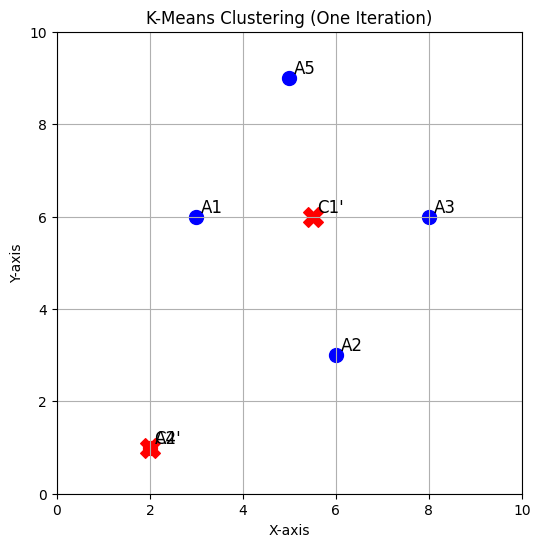

In [22]:
"""
Visualization
"""

plt.figure(figsize=(6, 6))

# Plot the data points
for pid, pcoords in points.items():
    cid = assignments[pid]
    color = 'blue' if cid == 'C1' else 'red'
    plt.scatter(pcoords[0], pcoords[1], color=color, s=100)
    plt.text(pcoords[0] + 0.1, pcoords[1] + 0.1, pid, fontsize=12)

# Plot the new centroids
for cid, ccoords in new_centroids.items():
    plt.scatter(ccoords[0], ccoords[1], color='red', marker='X', s=200)
    plt.text(ccoords[0] + 0.1, ccoords[1] + 0.1, cid + "'", fontsize=12)

# Setting the axes and grid
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering (One Iteration)')
plt.grid(True)
plt.show()

In [23]:
# WSS Calculation
wss = {}

for cid, plist in clusters.items():
    centroid = new_centroids[cid]
    wss_cluster = 0
    print(f"\nCalculating WSS for {cid}:")
    for point in plist:
        distance = math.sqrt((point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2)
        wss_cluster += distance ** 2
        print(f"  Point {point}, Distance to centroid: {distance:.3f}, Squared: {distance ** 2:.3f}")
    wss[cid] = wss_cluster
    print(f"  WSS for {cid}: {wss_cluster:.3f}")

total_wss = sum(wss.values())
print(f"\nTotal WSS: {total_wss:.3f}")

# Silhouette Score Calculation
data = np.array([points[pid] for pid in points.keys()])
labels = np.array([0 if assignments[pid] == 'C1' else 1 for pid in points.keys()])

silhouette_vals = silhouette_samples(data, labels)
average_silhouette = silhouette_score(data, labels)

print("\nSilhouette Scores for Each Point:")
for idx, pid in enumerate(points.keys()):
    print(f"{pid}: {silhouette_vals[idx]:.3f}")

print(f"\nAverage Silhouette Score: {average_silhouette:.3f}")


Calculating WSS for C1:
  Point [3, 6], Distance to centroid: 2.500, Squared: 6.250
  Point [6, 3], Distance to centroid: 3.041, Squared: 9.250
  Point [8, 6], Distance to centroid: 2.500, Squared: 6.250
  Point [5, 9], Distance to centroid: 3.041, Squared: 9.250
  WSS for C1: 31.000

Calculating WSS for C2:
  Point [2, 1], Distance to centroid: 0.000, Squared: 0.000
  WSS for C2: 0.000

Total WSS: 31.000

Silhouette Scores for Each Point:
A1: 0.160
A2: -0.037
A3: 0.452
A4: 0.000
A5: 0.457

Average Silhouette Score: 0.206


In [25]:
"""
Part 2: Programming
"""

import pandas as pd

In [32]:
# Load the dataset
data = pd.read_csv('data/MCS_dataset.csv')

# Display the dataset
data.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Legitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [38]:
"""
Create training and test datasets based on the Day feature.
"""

# List of features to be used
features = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
            'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']

# Target variable
target = 'Legitimacy'

# Create training set (Day values 0, 1, 2)
train_data = data[data['Day'].isin([0, 1, 2])]

# Create test set (Day value 3)
test_data = data[data['Day'] == 3]

# Separate features and target
X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

X_train.head()
# y_train.head()

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380
1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380
2,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996
3,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996
4,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [40]:
# Check for missing values
print("Missing values in training set:\n", X_train.isnull().sum())
print("Missing values in test set:\n", X_test.isnull().sum())

# Impute missing values if necessary
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use training mean to avoid data leakage

Missing values in training set:
 Latitude         0
Longitude        0
Day              0
Hour             0
Minute           0
Duration         0
RemainingTime    0
Resources        0
Coverage         0
OnPeakHours      0
GridNumber       0
dtype: int64
Missing values in test set:
 Latitude         0
Longitude        0
Day              0
Hour             0
Minute           0
Duration         0
RemainingTime    0
Resources        0
Coverage         0
OnPeakHours      0
GridNumber       0
dtype: int64


In [41]:
"""
Since KNN is distance-based, scaling features is beneficial.
"""

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data
X_test_scaled = scaler.transform(X_test)

In [50]:
"""
Train Naive Bayes Classifier
"""
# Instantiate the classifier
nb_classifier = GaussianNB()
# Train the classifier
nb_classifier.fit(X_train, y_train)
# Make predictions
nb_predictions = nb_classifier.predict(X_test)

"""
Train KNN Classifier
"""
# Instantiate the classifier with k neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# Train the classifier
knn_classifier.fit(X_train_scaled, y_train)
# Make predictions
knn_predictions = knn_classifier.predict(X_test_scaled)

In [51]:
"""
Confusion Matrix and F1 Score of Naive Bayes
"""

# Confusion matrix
nb_cm = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Confusion Matrix:\n", nb_cm)

# F1 score
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
print("Naive Bayes F1 Score:", nb_f1)

# Classification report
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))



"""
Confusion Matrix and F1 Score of KNN Classifier
"""

# Confusion matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
print("KNN Confusion Matrix:\n", knn_cm)

# F1 score
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
print("KNN F1 Score:", knn_f1)

# Classification report
print("KNN Classification Report:\n", classification_report(y_test, knn_predictions))

Naive Bayes Confusion Matrix:
 [[   2  310]
 [   0 2148]]
Naive Bayes F1 Score: 0.8160189298583262
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.01       312
           1       0.87      1.00      0.93      2148

    accuracy                           0.87      2460
   macro avg       0.94      0.50      0.47      2460
weighted avg       0.89      0.87      0.82      2460

KNN Confusion Matrix:
 [[  98  214]
 [ 212 1936]]
KNN F1 Score: 0.8265911497593652
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.31      0.32       312
           1       0.90      0.90      0.90      2148

    accuracy                           0.83      2460
   macro avg       0.61      0.61      0.61      2460
weighted avg       0.83      0.83      0.83      2460



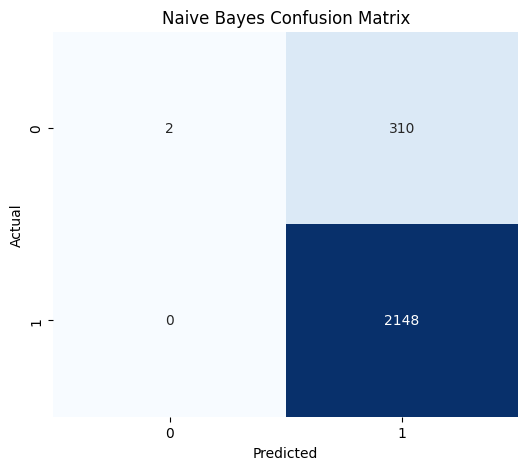

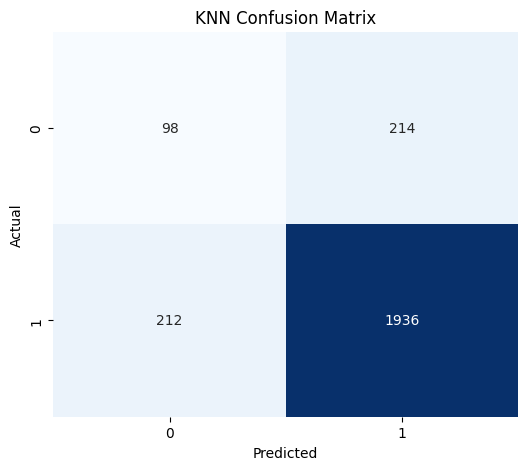

In [52]:
"""
Visualize Confusion Matrices
"""

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot for Naive Bayes
plot_confusion_matrix(nb_cm, 'Naive Bayes Confusion Matrix')

# Plot for KNN
plot_confusion_matrix(knn_cm, 'KNN Confusion Matrix')

In [53]:
"""
Perform t-SNE Dimensionality Reduction
"""

from sklearn.manifold import TSNE

"""
For Training Set
"""
# Perform t-SNE on training data
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Create a DataFrame for plotting
train_tsne_df = pd.DataFrame({
    'Dimension 1': X_train_tsne[:, 0],
    'Dimension 2': X_train_tsne[:, 1],
    'Legitimacy': y_train
})

"""
For Test Set
"""
# Perform t-SNE on test data
X_test_tsne = tsne.fit_transform(X_test_scaled)

# Create a DataFrame for plotting
test_tsne_df = pd.DataFrame({
    'Dimension 1': X_test_tsne[:, 0],
    'Dimension 2': X_test_tsne[:, 1],
    'Legitimacy': y_test
})

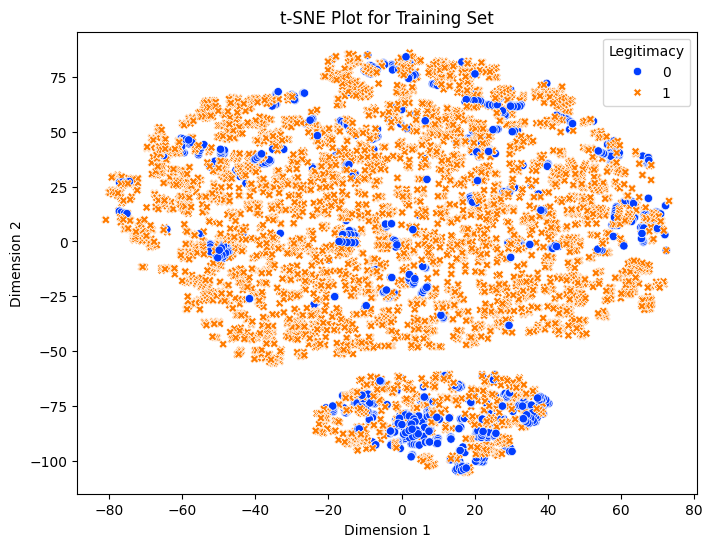

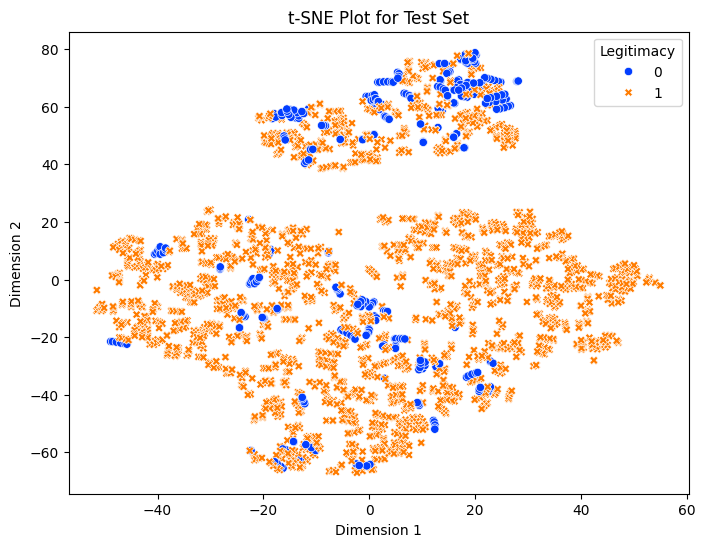

In [54]:
# Training Set Plotting
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_tsne_df, x='Dimension 1', y='Dimension 2', hue='Legitimacy',
                palette='bright', style='Legitimacy', markers=True)
plt.title('t-SNE Plot for Training Set')
plt.legend(title='Legitimacy')
plt.show()


# Test Set Plotting
plt.figure(figsize=(8,6))
sns.scatterplot(data=test_tsne_df, x='Dimension 1', y='Dimension 2', hue='Legitimacy',
                palette='bright', style='Legitimacy', markers=True)
plt.title('t-SNE Plot for Test Set')
plt.legend(title='Legitimacy')
plt.show()

In [63]:
"""
Part 3: Dimensionality Reduction and Analysis
"""

# For PCA
from sklearn.decomposition import PCA

# For Autoencoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [69]:
"""
Baseline Performance without Dimensionality Reduction
"""

# Naive Bayes baseline
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_predictions = nb_classifier.predict(X_test_scaled)
nb_baseline_f1 = f1_score(y_test, nb_predictions, average='weighted')
print(f"Naive Bayes Baseline F1 Score: {nb_baseline_f1:.4f}")

# KNN baseline
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)
knn_baseline_f1 = f1_score(y_test, knn_predictions, average='weighted')
print(f"KNN Baseline F1 Score: {knn_baseline_f1:.4f}")

Naive Bayes Baseline F1 Score: 0.8418
KNN Baseline F1 Score: 0.8321


In [71]:
"""
Apply PCA to reduce the dimensionality of the dataset and
evaluate the classifier performances for each number of components
"""

# Range of components to test
n_components_range = range(1, X_train_scaled.shape[1] + 1)

# Lists to store F1 scores
nb_f1_scores_pca = []
knn_f1_scores_pca = []

for n_components in n_components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Naive Bayes
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_pca, y_train)
    nb_predictions = nb_classifier.predict(X_test_pca)
    nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
    nb_f1_scores_pca.append(nb_f1)
    
    # KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train_pca, y_train)
    knn_predictions = knn_classifier.predict(X_test_pca)
    knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
    knn_f1_scores_pca.append(knn_f1)
    
print(nb_f1_scores_pca)
print(knn_f1_scores_pca)

[0.8140497967479675, 0.8519746577723627, 0.8492710440421045, 0.8515290328358988, 0.8497874379131526, 0.8525558624145411, 0.8522140436587184, 0.8613115073849839, 0.8479652537177411, 0.8446515970165958, 0.8465313224302374]
[0.8181493828461395, 0.7840935876080319, 0.7934935814679143, 0.8031019903991627, 0.8056995552533923, 0.8174874472799775, 0.8230493900546227, 0.8335480810586227, 0.8453464344796496, 0.8321405267724405, 0.8321405267724405]


In [80]:
"""
Dimensionality Reduction with Autoencoder
"""

n_components_ae = n_components_range

# Lists to store F1 scores
nb_f1_scores_ae = []
knn_f1_scores_ae = []

input_dim = X_train_scaled.shape[1]

for n_components in n_components_ae:
    # Build the Autoencoder model
    input_layer = Input(shape=(input_dim,))
    # Encoder
    encoded = Dense(n_components, activation='relu')(input_layer)
    # Decoder
    decoded = Dense(input_dim, activation='linear')(encoded)
    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    # Encoder model
    encoder = Model(inputs=input_layer, outputs=encoded)
    
    # Compile the autoencoder
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    # Train the autoencoder
    autoencoder.fit(X_train_scaled, X_train_scaled,
                    epochs=50,
                    batch_size=32,
                    shuffle=True,
                    verbose=0)  # Set verbose=1 to see training progress
    
    # Transform the data using the encoder
    X_train_ae = encoder.predict(X_train_scaled)
    X_test_ae = encoder.predict(X_test_scaled)
    
    # Naive Bayes
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_ae, y_train)
    nb_predictions = nb_classifier.predict(X_test_ae)
    nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
    nb_f1_scores_ae.append(nb_f1)
    
    # KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train_ae, y_train)
    knn_predictions = knn_classifier.predict(X_test_ae)
    knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
    knn_f1_scores_ae.append(knn_f1)

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


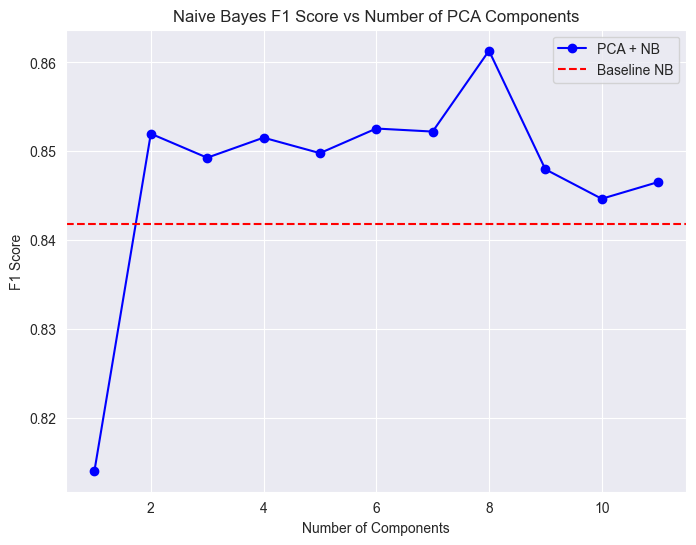

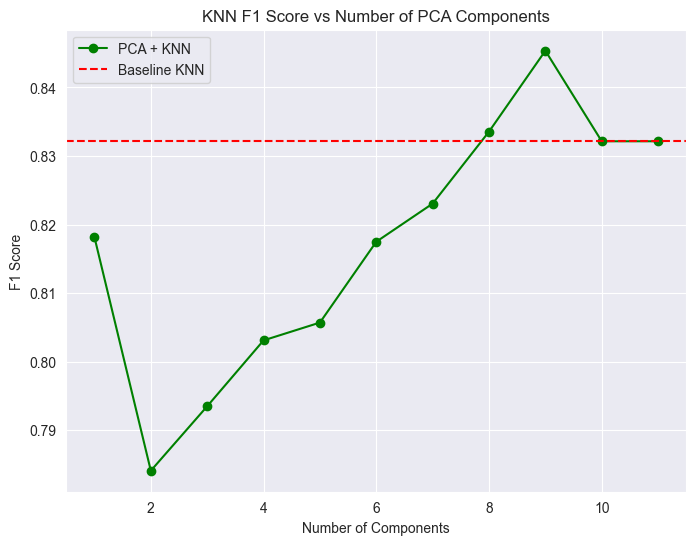

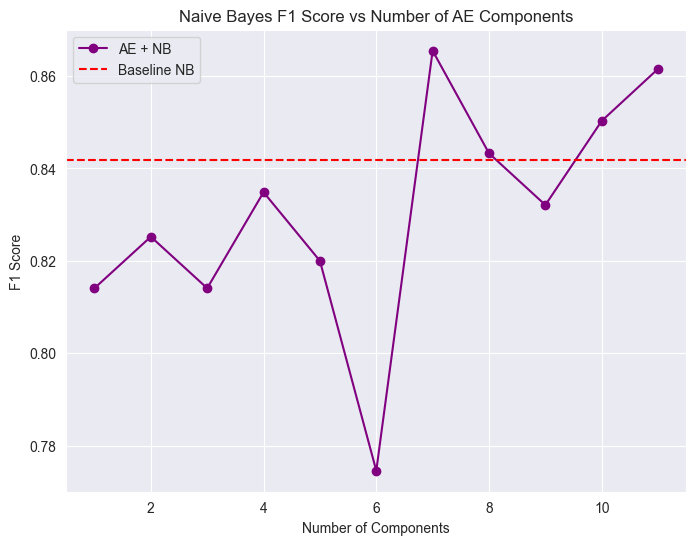

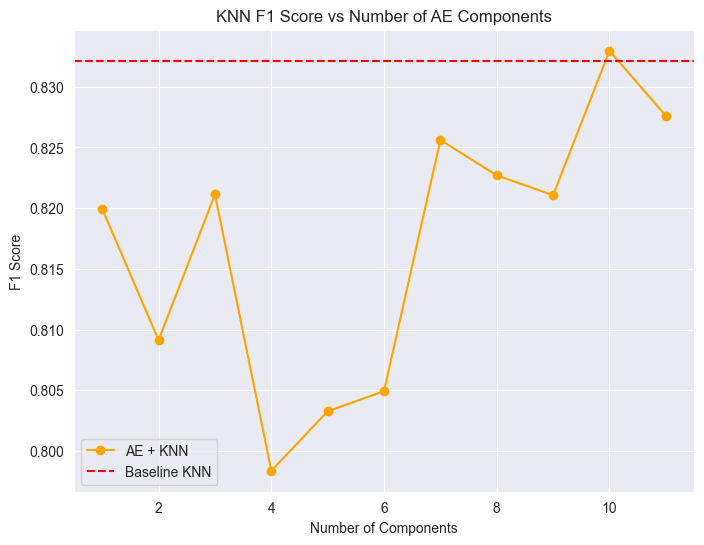

In [81]:
"""
PCA with Naive Bayes
"""
plt.figure(figsize=(8,6))
plt.plot(n_components_range, nb_f1_scores_pca, marker='o', linestyle='-', color='blue', label='PCA + NB')
plt.axhline(y=nb_baseline_f1, color='red', linestyle='--', label='Baseline NB')
plt.title('Naive Bayes F1 Score vs Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

"""
PCA with KNN
"""
plt.figure(figsize=(8,6))
plt.plot(n_components_range, knn_f1_scores_pca, marker='o', linestyle='-', color='green', label='PCA + KNN')
plt.axhline(y=knn_baseline_f1, color='red', linestyle='--', label='Baseline KNN')
plt.title('KNN F1 Score vs Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

"""
Autoencoder with Naive Bayes
"""
plt.figure(figsize=(8,6))
plt.plot(n_components_ae, nb_f1_scores_ae, marker='o', linestyle='-', color='purple', label='AE + NB')
plt.axhline(y=nb_baseline_f1, color='red', linestyle='--', label='Baseline NB')
plt.title('Naive Bayes F1 Score vs Number of AE Components')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

"""
Autoencoder with KNN
"""
plt.figure(figsize=(8,6))
plt.plot(n_components_ae, knn_f1_scores_ae, marker='o', linestyle='-', color='orange', label='AE + KNN')
plt.axhline(y=knn_baseline_f1, color='red', linestyle='--', label='Baseline KNN')
plt.title('KNN F1 Score vs Number of AE Components')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
"""
Apply the Best Dimensionality Reduction
"""

# Set the number of components that gave the best performance
n_components_best = np.argmax(nb_f1_scores_pca) + 1

# Apply PCA with the best number of components
pca_best = PCA(n_components=n_components_best)
X_train_best = pca_best.fit_transform(X_train_scaled)
X_test_best = pca_best.transform(X_test_scaled)

In [79]:
from sklearn.manifold import TSNE

# For training data
tsne_train = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne_train.fit_transform(X_train_best)

# For test data
tsne_test = TSNE(n_components=2, random_state=0)
X_test_tsne = tsne_test.fit_transform(X_test_best)

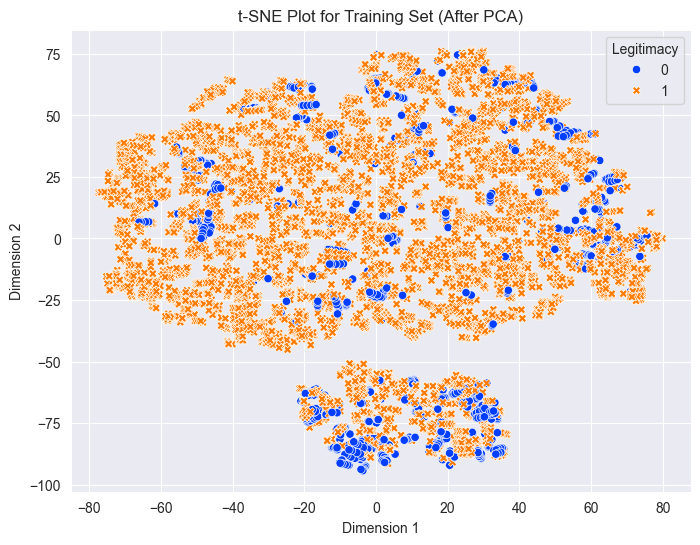

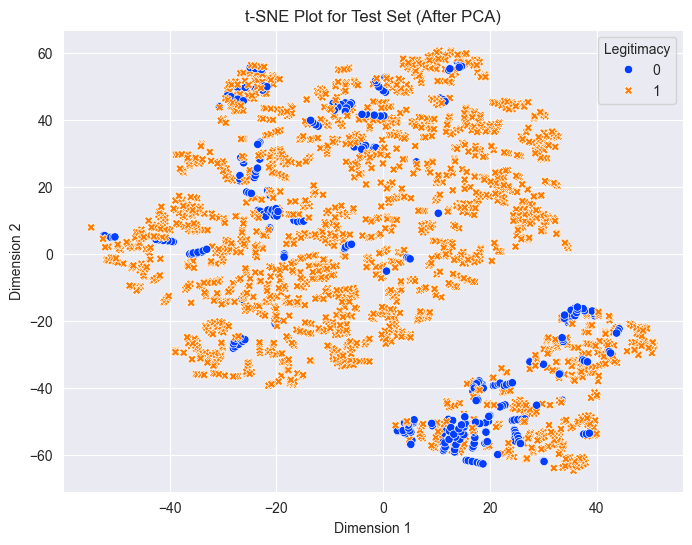

In [82]:
# Training Set
train_tsne_df = pd.DataFrame({
    'Dimension 1': X_train_tsne[:, 0],
    'Dimension 2': X_train_tsne[:, 1],
    'Legitimacy': y_train.reset_index(drop=True)
})

# Test Set
test_tsne_df = pd.DataFrame({
    'Dimension 1': X_test_tsne[:, 0],
    'Dimension 2': X_test_tsne[:, 1],
    'Legitimacy': y_test.reset_index(drop=True)
})

# Training Set Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_tsne_df, x='Dimension 1', y='Dimension 2', hue='Legitimacy',
                palette='bright', style='Legitimacy', markers=True)
plt.title('t-SNE Plot for Training Set (After PCA)')
plt.legend(title='Legitimacy')
plt.show()

# Test Set Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=test_tsne_df, x='Dimension 1', y='Dimension 2', hue='Legitimacy',
                palette='bright', style='Legitimacy', markers=True)
plt.title('t-SNE Plot for Test Set (After PCA)')
plt.legend(title='Legitimacy')
plt.show()

In [83]:
"""
Part 4: Feature Selection Exploration
"""

# Feature Selection
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest, SequentialFeatureSelector

In [107]:
"""
Apply Filter Methods and Plot Number of Features vs F1 Score
"""

# Baseline with Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_predictions = nb_classifier.predict(X_test_scaled)
nb_baseline_f1 = f1_score(y_test, nb_predictions, average='weighted')
print(f"Baseline Naive Bayes F1 Score: {nb_baseline_f1:.4f}")

# Baseline with KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)
knn_baseline_f1 = f1_score(y_test, knn_predictions, average='weighted')
print(f"Baseline KNN F1 Score: {knn_baseline_f1:.4f}")

Baseline Naive Bayes F1 Score: 0.8418
Baseline KNN F1 Score: 0.8321


In [108]:
# Variance Threshold
thresholds = np.linspace(0, 1, 20)
nb_f1_scores_var = []
knn_f1_scores_var = []
num_features = []

for thresh in thresholds:
    selector = VarianceThreshold(threshold=thresh)
    X_train_var = selector.fit_transform(X_train_scaled)
    X_test_var = selector.transform(X_test_scaled)
    
    # Number of features selected
    n_features = X_train_var.shape[1]
    num_features.append(n_features)
    
    # Naive Bayes
    nb_classifier.fit(X_train_var, y_train)
    nb_predictions = nb_classifier.predict(X_test_var)
    nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
    nb_f1_scores_var.append(nb_f1)
    
    # KNN
    knn_classifier.fit(X_train_var, y_train)
    knn_predictions = knn_classifier.predict(X_test_var)
    knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
    knn_f1_scores_var.append(knn_f1)

In [109]:
# Mutual Information
k_values = range(1, len(features) + 1)
nb_f1_scores_mi = []
knn_f1_scores_mi = []

for k in k_values:
    selector = SelectKBest(mutual_info_classif, k=k)
    X_train_mi = selector.fit_transform(X_train_scaled, y_train)
    X_test_mi = selector.transform(X_test_scaled)
    
    # Naive Bayes
    nb_classifier.fit(X_train_mi, y_train)
    nb_predictions = nb_classifier.predict(X_test_mi)
    nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
    nb_f1_scores_mi.append(nb_f1)
    
    # KNN
    knn_classifier.fit(X_train_mi, y_train)
    knn_predictions = knn_classifier.predict(X_test_mi)
    knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
    knn_f1_scores_mi.append(knn_f1)

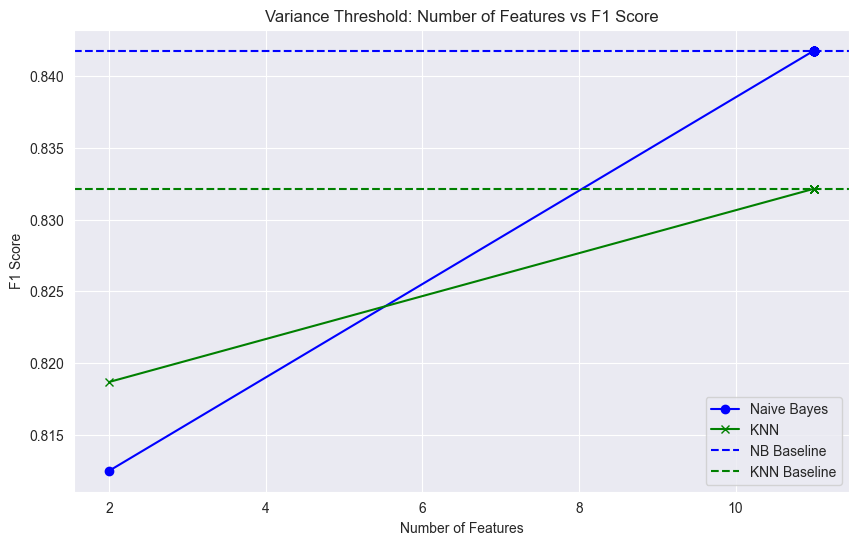

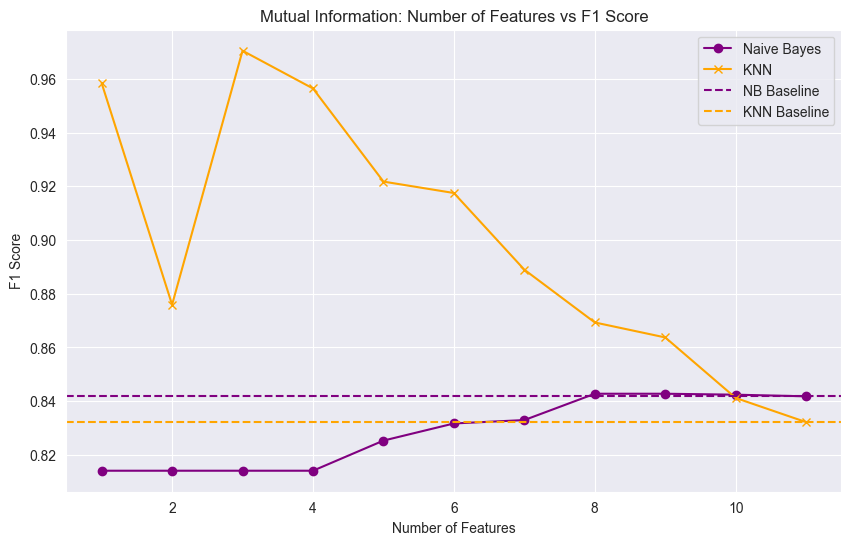

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(num_features, nb_f1_scores_var, marker='o', linestyle='-', color='blue', label='Naive Bayes')
plt.plot(num_features, knn_f1_scores_var, marker='x', linestyle='-', color='green', label='KNN')
plt.axhline(y=nb_baseline_f1, color='blue', linestyle='--', label='NB Baseline')
plt.axhline(y=knn_baseline_f1, color='green', linestyle='--', label='KNN Baseline')
plt.title('Variance Threshold: Number of Features vs F1 Score')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, nb_f1_scores_mi, marker='o', linestyle='-', color='purple', label='Naive Bayes')
plt.plot(k_values, knn_f1_scores_mi, marker='x', linestyle='-', color='orange', label='KNN')
plt.axhline(y=nb_baseline_f1, color='purple', linestyle='--', label='NB Baseline')
plt.axhline(y=knn_baseline_f1, color='orange', linestyle='--', label='KNN Baseline')
plt.title('Mutual Information: Number of Features vs F1 Score')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
"""
Apply Wrapper Methods and Plot Number of Features vs. Accuracy
"""

# Baseline accuracy with Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_predictions = nb_classifier.predict(X_test_scaled)
nb_baseline_acc = accuracy_score(y_test, nb_predictions)
print(f"Baseline Naive Bayes Accuracy: {nb_baseline_acc:.4f}")

# Baseline accuracy with KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)
knn_baseline_acc = accuracy_score(y_test, knn_predictions)
print(f"Baseline KNN Accuracy: {knn_baseline_acc:.4f}")

Baseline Naive Bayes Accuracy: 0.8325
Baseline KNN Accuracy: 0.8415


In [120]:
# Naive Bayes with Forward Selection
nb_forward_acc = []
num_features_fs = []

for n_features in range(1, len(features)):
    sfs = SequentialFeatureSelector(nb_classifier, n_features_to_select=n_features, direction='forward')
    sfs.fit(X_train_scaled, y_train)
    selected_features = sfs.get_support(indices=True)
    
    X_train_fs = X_train_scaled[:, selected_features]
    X_test_fs = X_test_scaled[:, selected_features]
    
    nb_classifier.fit(X_train_fs, y_train)
    nb_predictions = nb_classifier.predict(X_test_fs)
    nb_acc = accuracy_score(y_test, nb_predictions)
    nb_forward_acc.append(nb_acc)
    num_features_fs.append(n_features)
    
    
# KNN with Backward Elimination
knn_backward_acc = []
num_features_be = []

for n_features in range(len(features) - 1, 0, -1):
    sfs = SequentialFeatureSelector(knn_classifier, n_features_to_select=n_features, direction='backward')
    sfs.fit(X_train_scaled, y_train)
    selected_features = sfs.get_support(indices=True)
    
    X_train_be = X_train_scaled[:, selected_features]
    X_test_be = X_test_scaled[:, selected_features]
    
    knn_classifier.fit(X_train_be, y_train)
    knn_predictions = knn_classifier.predict(X_test_be)
    knn_acc = accuracy_score(y_test, knn_predictions)
    knn_backward_acc.append(knn_acc)
    num_features_be.append(n_features)

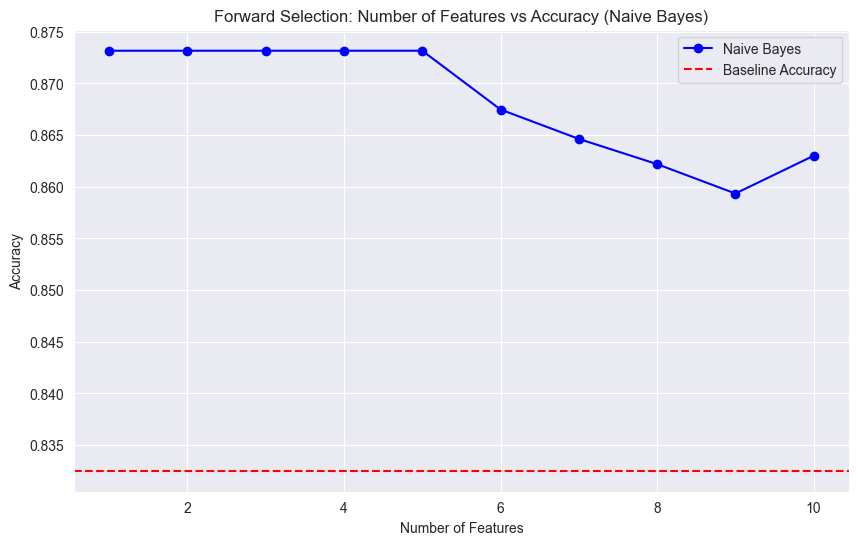

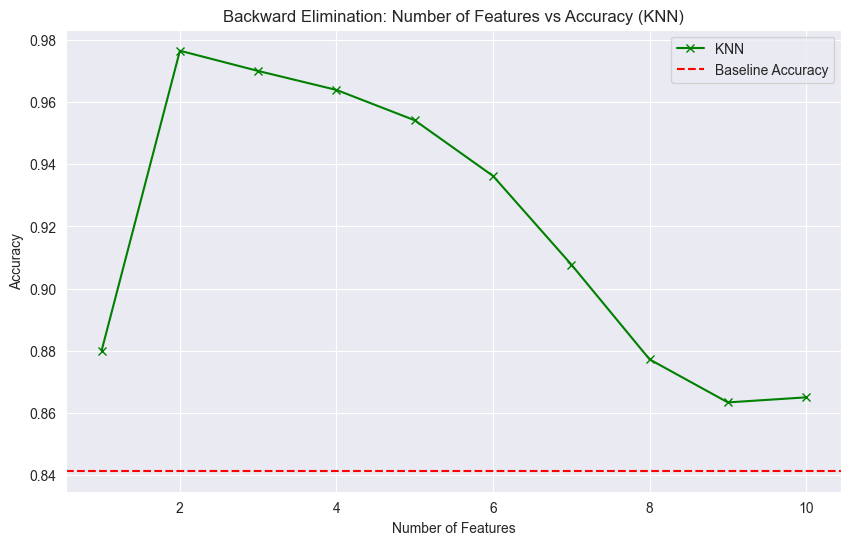

In [123]:
# Naive Bayes Forward Selection Results
plt.figure(figsize=(10, 6))
plt.plot(num_features_fs, nb_forward_acc, marker='o', linestyle='-', color='blue', label='Naive Bayes')
plt.axhline(y=nb_baseline_acc, color='red', linestyle='--', label='Baseline Accuracy')
plt.title('Forward Selection: Number of Features vs Accuracy (Naive Bayes)')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# KNN Backward Elimination Results
plt.figure(figsize=(10, 6))
plt.plot(num_features_be[::-1], knn_backward_acc[::-1], marker='x', linestyle='-', color='green', label='KNN')
plt.axhline(y=knn_baseline_acc, color='red', linestyle='--', label='Baseline Accuracy')
plt.title('Backward Elimination: Number of Features vs Accuracy (KNN)')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Selected Features: ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration', 'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']


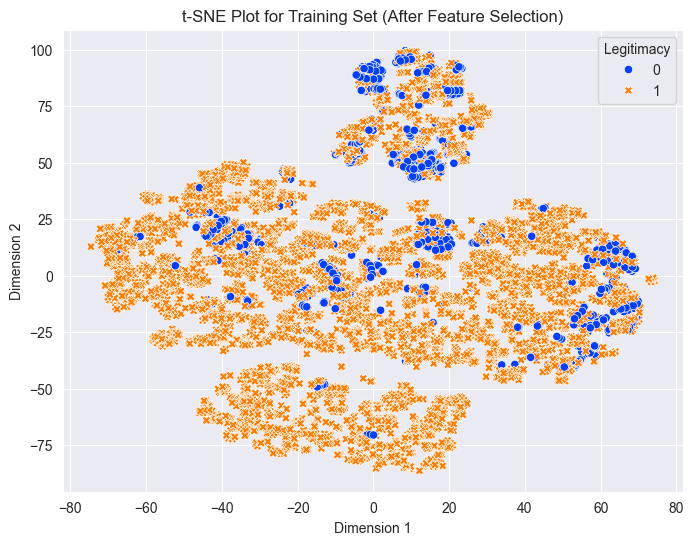

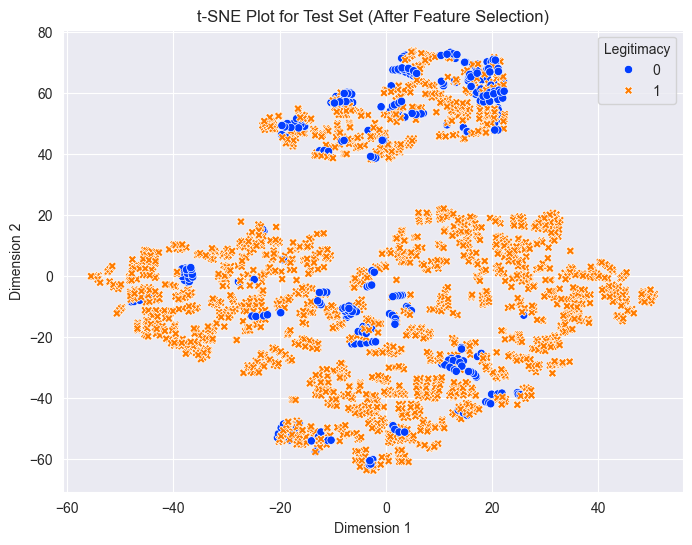

In [124]:
"""
Generate 2D t-SNE Plots for the Best Feature Selection Method
"""

# Choose the value of K that gave the best F1 score
best_k = np.argmax(knn_backward_acc) + 1

sfs = SequentialFeatureSelector(knn_classifier, n_features_to_select=best_k, direction='backward')
sfs.fit(X_train_scaled, y_train)
selected_features = sfs.get_support(indices=True)

X_train_best = X_train_scaled[:, selected_features]
X_test_best = X_test_scaled[:, selected_features]

# Get selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_feature_indices]
print("Selected Features:", selected_features)

# t-SNE on training data
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_best)

# t-SNE on test data
X_test_tsne = tsne.fit_transform(X_test_best)

# Training set
train_tsne_df = pd.DataFrame({
    'Dimension 1': X_train_tsne[:, 0],
    'Dimension 2': X_train_tsne[:, 1],
    'Legitimacy': y_train.reset_index(drop=True)
})

# Test set
test_tsne_df = pd.DataFrame({
    'Dimension 1': X_test_tsne[:, 0],
    'Dimension 2': X_test_tsne[:, 1],
    'Legitimacy': y_test.reset_index(drop=True)
})

# Training set plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_tsne_df, x='Dimension 1', y='Dimension 2', hue='Legitimacy',
                palette='bright', style='Legitimacy', markers=True)
plt.title('t-SNE Plot for Training Set (After Feature Selection)')
plt.legend(title='Legitimacy')
plt.show()

# Test set plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=test_tsne_df, x='Dimension 1', y='Dimension 2', hue='Legitimacy',
                palette='bright', style='Legitimacy', markers=True)
plt.title('t-SNE Plot for Test Set (After Feature Selection)')
plt.legend(title='Legitimacy')
plt.show()

In [134]:
"""
Part 5: Clustering of Geographic Features
"""

# Clustering algorithms
from sklearn.cluster import KMeans, DBSCAN

# For SOFM
from minisom import MiniSom

# Evaluation
from collections import Counter

In [129]:
# Load the dataset
data = pd.read_csv('data/MCS_dataset.csv')

# Features and target variable
features = ['Latitude', 'Longitude']
target = 'Legitimacy'

# Extract the relevant features and target
X = data[features].fillna(0)
y = data[target]

# Combine features and target for analysis
data_geo = pd.concat([X, y], axis=1)

array([1, 0])

In [130]:
"""
Apply K-means clustering to plot the number of clusters vs legitimate-only members in clusters.
"""

cluster_range = range(2, 16)  # From 2 to 15 clusters
legitimate_only_counts = []

for n_clusters in cluster_range:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    data_geo['Cluster'] = kmeans.fit_predict(X)
    
    # Analyze clusters
    clusters = data_geo.groupby('Cluster')
    legitimate_only = 0
    
    for cluster_id, group in clusters:
        # Check if all members are legitimate (Legitimacy == 1)
        if group[target].nunique() == 1 and group[target].iloc[0] == 1:
            legitimate_only += 1
    
    legitimate_only_counts.append(legitimate_only)
    print(f"Number of Clusters: {n_clusters}, Legitimate-Only Clusters: {legitimate_only}")

Number of Clusters: 2, Legitimate-Only Clusters: 0
Number of Clusters: 3, Legitimate-Only Clusters: 0
Number of Clusters: 4, Legitimate-Only Clusters: 0
Number of Clusters: 5, Legitimate-Only Clusters: 0
Number of Clusters: 6, Legitimate-Only Clusters: 1
Number of Clusters: 7, Legitimate-Only Clusters: 2
Number of Clusters: 8, Legitimate-Only Clusters: 2
Number of Clusters: 9, Legitimate-Only Clusters: 3
Number of Clusters: 10, Legitimate-Only Clusters: 4
Number of Clusters: 11, Legitimate-Only Clusters: 5
Number of Clusters: 12, Legitimate-Only Clusters: 6
Number of Clusters: 13, Legitimate-Only Clusters: 7
Number of Clusters: 14, Legitimate-Only Clusters: 8
Number of Clusters: 15, Legitimate-Only Clusters: 8


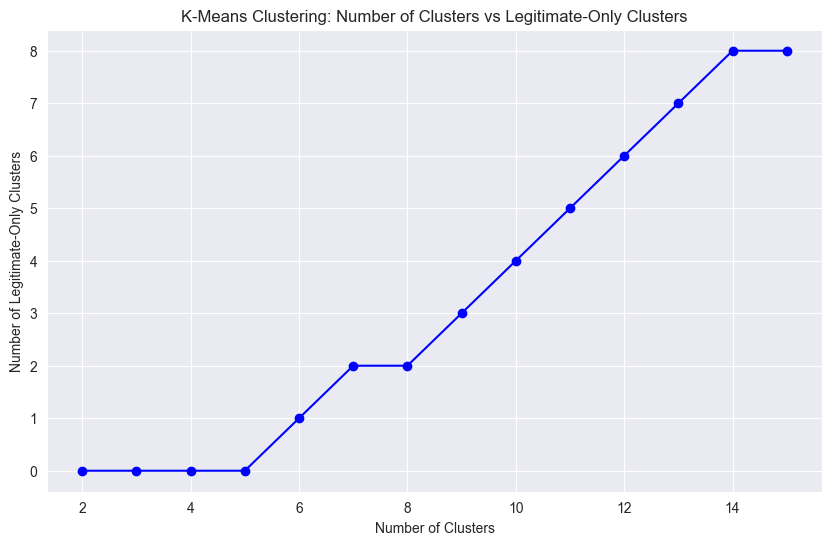

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, legitimate_only_counts, marker='o', linestyle='-', color='blue')
plt.title('K-Means Clustering: Number of Clusters vs Legitimate-Only Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Legitimate-Only Clusters')
plt.grid(True)
plt.show()

In [135]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

data_geo = pd.DataFrame(X_scaled, columns=features)
data_geo[target] = y

In [142]:
# Define the SOM grid dimensions
som_grid_rows = 10
som_grid_columns = 10

# Initialize the SOM
som = MiniSom(som_grid_rows, som_grid_columns, X_scaled.shape[1], sigma=0.5, learning_rate=0.5, random_seed=0)

# Initialize the weights
som.random_weights_init(X_scaled)

# Train the SOM
print("Training the SOM...")
som.train_random(X_scaled, num_iteration=1000)
print("SOM training completed!")

Training the SOM...
SOM training completed!


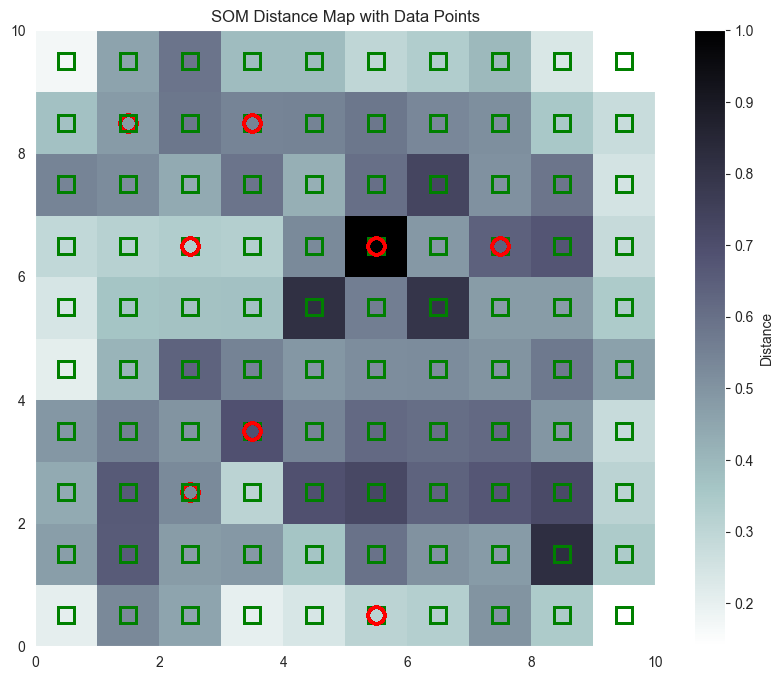

In [143]:
# Visualize the distance map (U-Matrix)
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Transposed for correct orientation
plt.colorbar(label='Distance')

# Add markers for each data point
markers = {0: 'o', 1: 's'}
colors = {0: 'r', 1: 'g'}

for idx, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[y[idx]], markerfacecolor='None',
             markeredgecolor=colors[y[idx]], markersize=12, markeredgewidth=2)

plt.title('SOM Distance Map with Data Points')
plt.show()

In [144]:
# Assign clusters
win_map = som.win_map(X_scaled)

# Create a dictionary to hold cluster assignments
cluster_assignments = {}
for x in X_scaled:
    w = som.winner(x)
    cluster_assignments[tuple(w)] = cluster_assignments.get(tuple(w), []) + [x]

# Map each data point to its cluster index
cluster_labels = []
for x in X_scaled:
    w = som.winner(x)
    cluster_labels.append(w[0] * som_grid_columns + w[1])

data_geo['Cluster'] = cluster_labels

In [145]:
clusters = data_geo.groupby('Cluster')
legitimate_only = 0

for cluster_id, group in clusters:
    if group[target].nunique() == 1 and group[target].iloc[0] == 1:
        legitimate_only += 1

total_clusters = len(clusters)
print(f"Total Clusters: {total_clusters}, Legitimate-Only Clusters: {legitimate_only}")

Total Clusters: 100, Legitimate-Only Clusters: 92


In [146]:
grid_sizes = [(5, 5), (7, 7), (10, 10), (12, 12), (15, 15)]
legitimate_only_counts_som = []
total_clusters_som = []

for som_grid_rows, som_grid_columns in grid_sizes:
    som = MiniSom(som_grid_rows, som_grid_columns, X_scaled.shape[1], sigma=0.5, learning_rate=0.5, random_seed=0)
    som.random_weights_init(X_scaled)
    som.train_random(X_scaled, num_iteration=1000)
    
    # Assign clusters
    cluster_labels = []
    for x in X_scaled:
        w = som.winner(x)
        cluster_labels.append(w[0] * som_grid_columns + w[1])

    data_geo['Cluster'] = cluster_labels

    # Analyze clusters
    clusters = data_geo.groupby('Cluster')
    legitimate_only = 0

    for cluster_id, group in clusters:
        if group[target].nunique() == 1 and group[target].iloc[0] == 1:
            legitimate_only += 1

    legitimate_only_counts_som.append(legitimate_only)
    total_clusters_som.append(som_grid_rows * som_grid_columns)
    print(f"Grid Size: {som_grid_rows}x{som_grid_columns}, Total Clusters: {som_grid_rows * som_grid_columns}, Legitimate-Only Clusters: {legitimate_only}")

Grid Size: 5x5, Total Clusters: 25, Legitimate-Only Clusters: 16
Grid Size: 7x7, Total Clusters: 49, Legitimate-Only Clusters: 40
Grid Size: 10x10, Total Clusters: 100, Legitimate-Only Clusters: 92
Grid Size: 12x12, Total Clusters: 144, Legitimate-Only Clusters: 134
Grid Size: 15x15, Total Clusters: 225, Legitimate-Only Clusters: 205


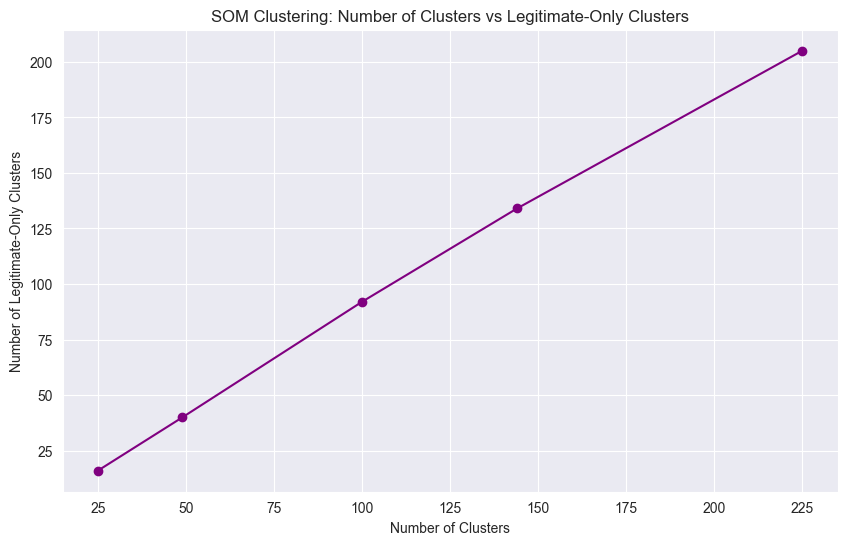

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(total_clusters_som, legitimate_only_counts_som, marker='o', linestyle='-', color='purple')
plt.title('SOM Clustering: Number of Clusters vs Legitimate-Only Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Legitimate-Only Clusters')
plt.grid(True)
plt.show()

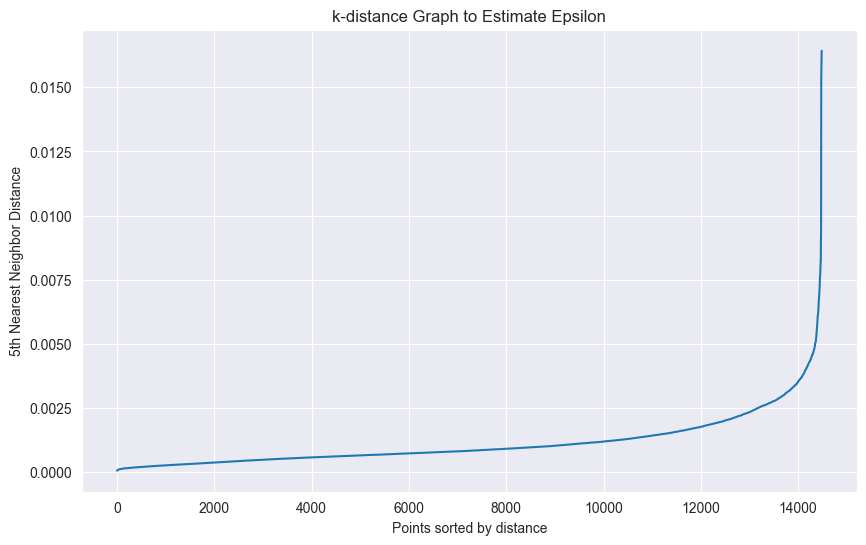

In [161]:
"""
Apply DBSCAN Clustering
"""

from sklearn.neighbors import NearestNeighbors

# Estimate a suitable epsilon value using k-distance graph
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph to Estimate Epsilon')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

In [163]:
eps_values = [0.01, 0.02, 0.03]
min_samples_values = [1, 2, 3, 4, 5, 6, 7]
results_dbscan = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        data_geo['Cluster'] = dbscan.fit_predict(X)
        n_clusters = len(set(data_geo['Cluster'])) - (1 if -1 in data_geo['Cluster'] else 0)
        
        # Analyze clusters
        clusters = data_geo[data_geo['Cluster'] != -1].groupby('Cluster')
        legitimate_only = 0
        for cluster_id, group in clusters:
            if group[target].nunique() == 1 and group[target].iloc[0] == 1:
                legitimate_only += 1
                    
        results_dbscan.append((eps, min_samples, n_clusters, legitimate_only))
        print(f"Eps: {eps}, Min Samples: {min_samples}, Clusters: {n_clusters}, Legitimate-Only Clusters: {legitimate_only}")

Eps: 0.01, Min Samples: 1, Clusters: 6, Legitimate-Only Clusters: 5
Eps: 0.01, Min Samples: 2, Clusters: 6, Legitimate-Only Clusters: 4
Eps: 0.01, Min Samples: 3, Clusters: 4, Legitimate-Only Clusters: 2
Eps: 0.01, Min Samples: 4, Clusters: 3, Legitimate-Only Clusters: 1
Eps: 0.01, Min Samples: 5, Clusters: 2, Legitimate-Only Clusters: 0
Eps: 0.01, Min Samples: 6, Clusters: 2, Legitimate-Only Clusters: 0
Eps: 0.01, Min Samples: 7, Clusters: 2, Legitimate-Only Clusters: 0
Eps: 0.02, Min Samples: 1, Clusters: 1, Legitimate-Only Clusters: 0
Eps: 0.02, Min Samples: 2, Clusters: 1, Legitimate-Only Clusters: 0
Eps: 0.02, Min Samples: 3, Clusters: 1, Legitimate-Only Clusters: 0
Eps: 0.02, Min Samples: 4, Clusters: 1, Legitimate-Only Clusters: 0
Eps: 0.02, Min Samples: 5, Clusters: 1, Legitimate-Only Clusters: 0
Eps: 0.02, Min Samples: 6, Clusters: 1, Legitimate-Only Clusters: 0
Eps: 0.02, Min Samples: 7, Clusters: 1, Legitimate-Only Clusters: 0
Eps: 0.03, Min Samples: 1, Clusters: 1, Legitima

In [175]:
# Choose parameters based on results
eps_value = 0.01
min_samples_value = 2

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data_geo['Cluster'] = dbscan.fit_predict(X)

# Number of clusters
n_clusters_dbscan = len(set(data_geo['Cluster'])) - (1 if -1 in data_geo['Cluster'] else 0)
print(f"Selected Eps: {eps_value}, Min Samples: {min_samples_value}")
print(f"Number of clusters: {n_clusters_dbscan}")

# Analyze clusters
clusters = data_geo[data_geo['Cluster'] != -1].groupby('Cluster')
legitimate_only = 0

for cluster_id, group in clusters:
    if group[target].nunique() == 1 and group[target].iloc[0] == 1:
        legitimate_only += 1

print(f"Legitimate-Only Clusters: {legitimate_only}")

Selected Eps: 0.01, Min Samples: 2
Number of clusters: 6
Legitimate-Only Clusters: 4


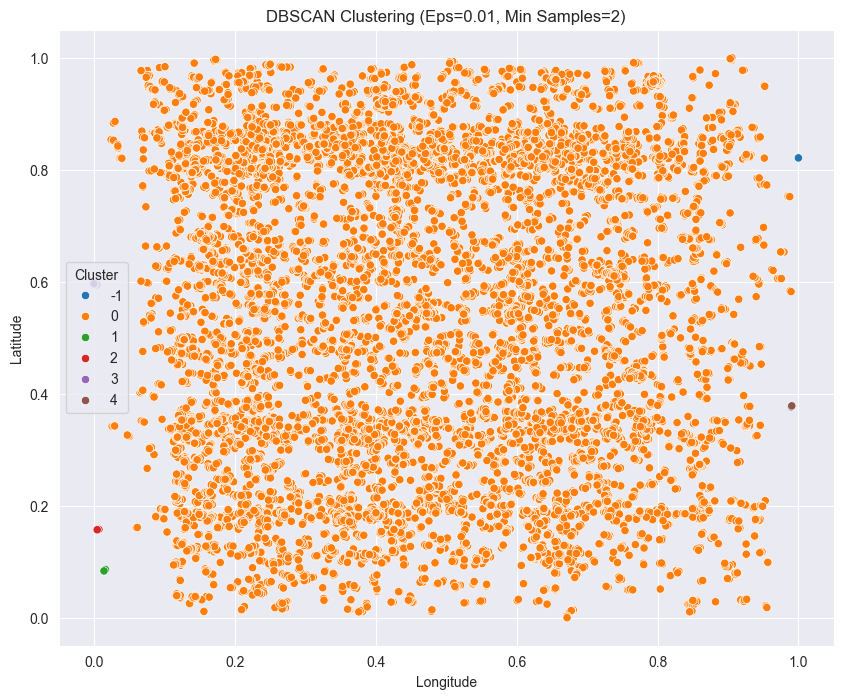

In [176]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_geo, x='Longitude', y='Latitude', hue='Cluster', palette='tab10')
plt.title(f'DBSCAN Clustering (Eps={eps_value}, Min Samples={min_samples_value})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()